# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier



---
## Step 0: Load The Data

The data(training,validation and test) is loaded from the pickle file provided.

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'data/train.p'
validation_file= 'data/valid.p'
testing_file = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration



#### 1.1. Providing a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

I used the numpy library to calculate summary statistics of the traffic
signs data set:
The number of training examples,testing examples,image data shape and number of classes are listed below.

In [2]:
import numpy as np

n_train = X_train.shape[0]

n_validation = X_valid.shape[0]

n_test = X_test.shape[0]

image_shape = X_train.shape[1:]

n_classes = len(np.unique(y_train,return_counts=True)[0])

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


#### 1.2 Including an exploratory visualization of the dataset

* Here i have created a function to get the Sign name from the classID.

In [3]:
def getSignName(classId):
    '''
    pandas is used to read csv file. It takes input as classId and returns the corresponding sign name.
    '''
    import pandas as pd
    sign_names = pd.read_csv("./signnames.csv",names=["ClassId","SignName"])
    return sign_names["SignName"][classId]



##### 1.2.1 Plotting random 6 images from the dataset and displaying the corresponding Sign name with it.

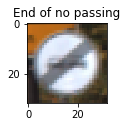

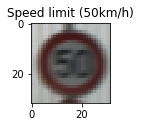

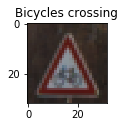

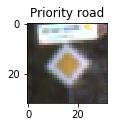

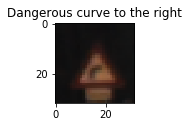

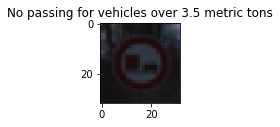

In [4]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

for i in range(6):
    index = random.randint(0, len(X_train))
    image = X_train[index].squeeze()
    plt.figure(figsize=(10,10))
    plt.subplot(1,6,i+1)
    plt.title(getSignName(y_train[index]+1))
    plt.imshow(image)
  

In [5]:
def show_data_distribution(ytrain,show_percentage=False):
    '''
    This method is used to show the number of images per class
    '''
    import matplotlib.pyplot as plt
    images_per_class = np.unique(ytrain,return_counts=True)[1]
    percent_images_per_class = images_per_class/np.sum(images_per_class)*100.0
    classes = np.unique(ytrain,return_counts=True)[0]
    if(show_percentage):
        plt.bar(classes,percent_images_per_class,color='g')
    else:
        plt.bar(classes,images_per_class,color='g')
    plt.show()

    

##### 1.2.2 The data distribution(i.e. images per class) is displayed below. 

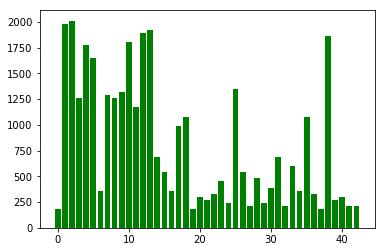

In [6]:
show_data_distribution(y_train)

----

## Step 2: Design and Test a Model Architecture

####  In this step i will describe what preprocessing steps i used and what model i choosed for this project.

##### 2.1 Pre-processing the data

I have applied grayscaling,histogram equlization and normalization in pre-processing.

1) I have used grayscaling because:
* For traffic signs shape is more important than color.
* The model trains faster on single channel grayscale image rather than 3 channel RGB image.

2) I have used histogram eqilization to equlize the brightness level in the images.

3) I used normalization technique to normlize the data in the range of 0.1 to 0.9 using the formula 0.1+((images)*(0.9-0.1))/(255-0) 

In [7]:
import cv2
import numpy as np
def convert_to_gray(input_images):
    '''
    uses cv2's inbuilt function to convert the input images to grayscale
    '''
    images = np.ndarray((input_images.shape[0], 32, 32, 1), dtype=np.uint8)
    for index, image in enumerate(input_images):
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        images[index] = image[:, :, np.newaxis]
    return images

def equilize_histogram(input_images):
    '''
    uses cv2's inbuilt function to equilize the histogram for input images
    grayscale input is supplied to this metho
    '''
    images = np.ndarray((input_images.shape[0], 32, 32, 1), dtype=np.uint8)
    for index, image in enumerate(input_images):
        image = cv2.equalizeHist(image)
        images[index] = image[:, :, np.newaxis]
    return images
def normalize(images):
    '''
    images are normalized in the range of 0.1 to 0.9
    '''
    images=0.1+((images)*(0.9-0.1))/(255-0)
    return images

The data is pre-processed(grayscaling,histogram equlization and normalization) at this step.

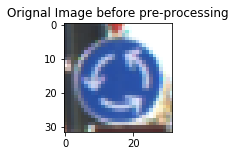

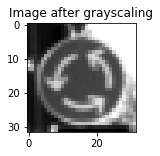

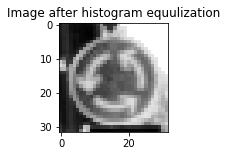

In [10]:
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()
plt.figure(figsize=(2,2))
plt.title("Orignal Image before pre-processing")
plt.imshow(image,cmap="gray")

X_train = convert_to_gray(X_train)
image = X_train[index].squeeze()
plt.figure(figsize=(2,2))
plt.title("Image after grayscaling")
plt.imshow(image,cmap="gray")

X_train = equilize_histogram(X_train)
image = X_train[index].squeeze()
plt.figure(figsize=(2,2))
plt.title("Image after histogram equulization")
plt.imshow(image,cmap="gray")

X_train = normalize(X_train)
X_valid = convert_to_gray(X_valid)
X_valid = equilize_histogram(X_valid)
X_valid = normalize(X_valid)
X_test = convert_to_gray(X_test)
X_test = equilize_histogram(X_test)
X_test = normalize(X_test)


### Model Architecture

I have used the LeNet model and modified it by changing the shape in the last fully connected layer and added dropout after 
first two fully connected layers to meet the project requirement.

My final model consisted of the following layers:

| Layer         		|     Description	        					| 
|:---------------------:|:---------------------------------------------:| 
| Input         		| 32x32x1 Grayscale image   					| 
| Convolution 5x5     	| 1x1 stride, valid padding, outputs 28x28x6 	|
| RELU					|												|
| Max pooling	      	| 2x2 stride,  outputs 14x14x6  				|
| Convolution 5x5	    | 1x1 stride, valid padding, outputs 10x10x16	|
| RELU					|												|
| Max pooling	      	| 2x2 stride,  outputs 5x5x16   				|
| Flatten    	      	| Output 400                                    |
| Fully connected		| Output 120   									|
| RELU					|												|
| Droput				| Keep_prob : 0.65								|
| Fully connected		| Output 84   									|
| RELU					|												|
| Droput				| Keep_prob : 0.65								|
| Fully connected		| Output 43   									|


In [11]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
'''
I have used the LeNet model and modified it by changing the shape in the last fully connected layer and added dropout after 
first two fully connected layers to meet the project requirement.
'''

from tensorflow.contrib.layers import flatten
import tensorflow as tf

def customLeNet(x):    
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1,keep_prob)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2,keep_prob)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [12]:

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

In [13]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)
rate = 0.001
EPOCHS = 70
BATCH_SIZE = 128

logits = customLeNet(x)
softmax_logits = tf.nn.softmax(logits)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [14]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y,keep_prob:1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train, Validate and Test the Model

###  How i trained the model

The training data is shuffled before passing to the model. A learning rate of 0.001 is used with 70 EPOCHS and a batch size of 128.

I have used an AdamOptimizer because A learning rate is maintained for each network weight (parameter) and separately adapted as learning unfolds as opposed to Stochastic gradient descent which maintains a single learning rate (termed alpha) for all weight updates and the learning rate does not change during training. [Source](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/)

Training...

EPOCH 1 ...
Validation Accuracy = 0.633
Training Accuracy = 0.664

EPOCH 2 ...
Validation Accuracy = 0.812
Training Accuracy = 0.838

EPOCH 3 ...
Validation Accuracy = 0.852
Training Accuracy = 0.885

EPOCH 4 ...
Validation Accuracy = 0.882
Training Accuracy = 0.922

EPOCH 5 ...
Validation Accuracy = 0.899
Training Accuracy = 0.942

EPOCH 6 ...
Validation Accuracy = 0.908
Training Accuracy = 0.956

EPOCH 7 ...
Validation Accuracy = 0.922
Training Accuracy = 0.961

EPOCH 8 ...
Validation Accuracy = 0.932
Training Accuracy = 0.967

EPOCH 9 ...
Validation Accuracy = 0.919
Training Accuracy = 0.968

EPOCH 10 ...
Validation Accuracy = 0.931
Training Accuracy = 0.976

EPOCH 11 ...
Validation Accuracy = 0.934
Training Accuracy = 0.978

EPOCH 12 ...
Validation Accuracy = 0.932
Training Accuracy = 0.978

EPOCH 13 ...
Validation Accuracy = 0.933
Training Accuracy = 0.983

EPOCH 14 ...
Validation Accuracy = 0.937
Training Accuracy = 0.985

EPOCH 15 ...
Validation Accuracy = 0.941
Tra

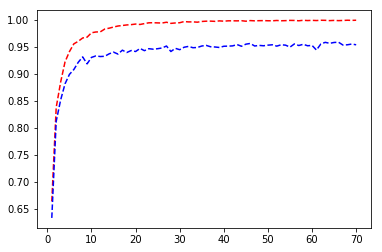

In [15]:

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    #num_examples = len(X_train)
    num_examples = len(X_train)
    validation_accuracy_list = []
    training_accuracy_list = []
    epochs = []
    print("Training...")
    print()
    for i in range(EPOCHS):
        epochs.append(i+1)
        X_train, y_train = shuffle(X_train, y_train)
        
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y,keep_prob:0.65})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        validation_accuracy_list.append(validation_accuracy)
        training_accuracy = evaluate(X_train, y_train)
        training_accuracy_list.append(training_accuracy)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print()
        
    saver.save(sess, './mysess')
    print("Model saved")
    plt.plot(epochs, training_accuracy_list,'r--',epochs,validation_accuracy_list,'b--')
    plt.show()

A plot of Accuracy(y-axis) vs Epochs(x-axis) is shown above. The red dotted line shows training accuracy 
and blue dotted line shows validation accuracy

In [16]:
with tf.Session() as sess:
    saver.restore(sess, './mysess')
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.938


####  Describing the approach taken for finding a solution and getting the validation set accuracy to be at least 0.93.

My final model results were:
* training set accuracy of 1.000
* validation set accuracy of 0.954
* test set accuracy of 0.938

* First i tried with the orignal lenet architecture without any augmentation or histogram equilization.
    It was giving me around 92-93% accuracy.
* Then i used histogram equilization which improved my model.
* At this point i was getting good training accuracy but the validation accuracy and test accuracy was not so good, probably my model was overfitting so i used a dropout of 35%(keep_prob:0.65) after the first two fully connected layers and after that i got the validation accuracy more than 95% and a test accuracy of 93.8%.

---

## Step 3: Test a Model on New Images



In [56]:
import os
import matplotlib.image as mpimage
new_labels = []
def get_user_images(folder):
    images = []
    
    for filename in os.listdir(folder):
        if filename.split('.')[1]!='jpg':
            continue
        img = mpimage.imread(os.path.join(folder,filename))
        if img is not None:
            img = cv2.resize(img,(32,32))
            #print(img.shape)
            images.append(img)
            new_labels.append(filename.split('.')[0])
    return images
images = get_user_images("myimages/")
print("Total ",len(images),"images fetched")
new_images = np.stack(images)
new_labels = np.stack(new_labels)


Total  10 images fetched


### Load and Output the Images

In [18]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

I have downloaded 10 images from the internet which are plotted below.

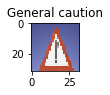

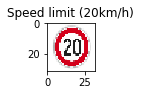

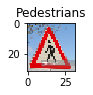

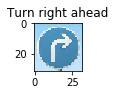

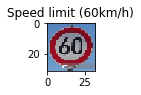

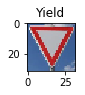

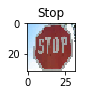

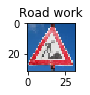

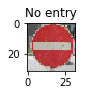

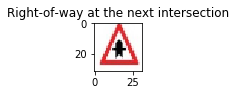

In [57]:
new_labels = [int(i) for i in new_labels]
for i in range(len(new_images)):
    plt.figure(figsize=(5,5))
    plt.subplot(2,5,i+1)
    
    plt.title(getSignName(new_labels[i]+1))
    plt.imshow(new_images[i],cmap="gray")

Pre-processing is done on the newly downloaded images.

In [58]:

new_images = convert_to_gray(new_images)
new_images = equilize_histogram(new_images)
new_images = normalize(new_images)



### Predict the Sign Type for Each Image

In [21]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

In [59]:
with tf.Session() as sess:
    saver.restore(sess, './mysess')
    probability_per_class = sess.run(softmax_logits, feed_dict={x: new_images, keep_prob:1})
    #find top 5 softmax probabilities
    top_k = sess.run(tf.nn.top_k(probability_per_class, k=5))
    

### Analyze Performance

In [23]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

In [60]:
pred = np.argmax(probability_per_class,1)
#pred = [getSignName(i) for i in pred]
print("Predicted Label class", pred)
#new_labels = [getSignName(i) for i in new_labels]
print("Orignal Label Class", new_labels)
#get the accuracy of model
cnt = 0
for i in range(len(new_labels)):
    if(pred[i]==new_labels[i]):
        cnt += 1
print("Test accuracy on new images:",(cnt/len(new_labels)*100),"%")


Predicted Label class [18  0 27 33  1 13 14 25 17 11]
Orignal Label Class [18, 0, 27, 33, 3, 13, 14, 25, 17, 11]
Test accuracy on new images: 90.0 %


The model predicted 9 out of 10 new images from the web correctly.

* The model predicted the 5th image of class 3(i.e 60 km/hr image) wrongly as image of class 1(i.e 30 km/hr) because the number of images in class 3 are less as compared to images in class 1, so the model is not trained properly on images of class 3(i.e 30 km/hr images).

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

In [61]:

float_formatter = lambda x: "%.4f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})

print(top_k)

TopKV2(values=array([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000],
       [1.0000, 0.0000, 0.0000, 0.0000, 0.0000],
       [0.9942, 0.0056, 0.0002, 0.0000, 0.0000],
       [1.0000, 0.0000, 0.0000, 0.0000, 0.0000],
       [0.9978, 0.0021, 0.0000, 0.0000, 0.0000],
       [1.0000, 0.0000, 0.0000, 0.0000, 0.0000],
       [0.7521, 0.0876, 0.0568, 0.0425, 0.0223],
       [1.0000, 0.0000, 0.0000, 0.0000, 0.0000],
       [1.0000, 0.0000, 0.0000, 0.0000, 0.0000],
       [0.9999, 0.0001, 0.0000, 0.0000, 0.0000]], dtype=float32), indices=array([[18, 26, 27, 24, 20],
       [ 0,  1,  8,  4, 40],
       [27, 11, 18, 24, 19],
       [33, 35, 37,  4, 39],
       [ 1,  6,  2,  5,  0],
       [13, 35,  0,  1,  2],
       [14, 12,  5, 25, 38],
       [25, 18, 19, 21, 29],
       [17, 14, 38, 13, 34],
       [11, 27, 18, 40, 12]], dtype=int32))


For most of the images it is predicting them right with a very high confidence accept for the 7th image(which is an image of stop sign) with a confidence of 75%.